# Importing Libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
sns.set(style="darkgrid", font_scale=1.5)
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)


from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor  
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.isotonic import IsotonicRegression  
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE


# Loading Datasets

In [156]:
# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

In [157]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

# Checking Shape of Training & Testing Datasets

In [158]:
print("Training Dataset shape is: ", train_df.shape)
print("Testing Dataset shape is: ", test_df.shape)

Training Dataset shape is:  (1460, 81)
Testing Dataset shape is:  (1459, 80)


# Showing Training & Testing Data

In [159]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [160]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Checking Duplicates Data

In [161]:
print(f"Duplicates in Train Dataset: {train_df.duplicated().sum()}, ({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Train Dataset: {test_df.duplicated().sum()}, ({100*test_df.duplicated().sum()/len(test_df)})%")


Duplicates in Train Dataset: 0, (0.0)%
Duplicates in Train Dataset: 0, (0.0)%


In [162]:
print("Data Types of features of Training Data:\n\n",train_df.dtypes)
print("\n"*7)
print("Data Types of features of Testing Data:\n\n",test_df.dtypes)

Data Types of features of Training Data:

 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBs

# Checking Total Number & Percentage of Missing Values in Training Data

## Train Data

In [163]:
df1 = (train_df.isna().sum()[train_df.isna().sum()>0]).to_frame().rename(columns={0: "Number of Missing Values"})
df1["Percentage of Missing values"] = round((100*train_df.isna().sum()[train_df.isna().sum()>0])/len(train_df), 2)
df1

,Number of Missing Values,Percentage of Missing values
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


## Test Data

In [164]:
df2 = (test_df.isna().sum()[test_df.isna().sum()>0]).to_frame().rename(columns={0: "Number of Missing Values"})
df2["Percentage of Missing values"] = round((100*test_df.isna().sum()[test_df.isna().sum()>0])/len(test_df), 2)
df2

,Number of Missing Values,Percentage of Missing values
MSZoning,4,0.27
LotFrontage,227,15.56
Alley,1352,92.67
Utilities,2,0.14
Exterior1st,1,0.07
Exterior2nd,1,0.07
MasVnrType,16,1.10
MasVnrArea,15,1.03
BsmtQual,44,3.02
BsmtCond,45,3.08


In [165]:
# Dropping features having high percentage of missing values and Utilities
to_drop = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "Utilities"]

train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)

print(train_df.shape)
print(test_df.shape)


(1460, 75)
(1459, 74)


# Checking Cardinality of Categorical Features

In [166]:
print("Cardinality of categorical features in Training dataset:\n\n",train_df.select_dtypes(include="object").nunique())
print("\n"*5)
print("Cardinality of categorical features in Testing dataset:\n\n", test_df.select_dtypes(include="object").nunique())

Cardinality of categorical features in Training dataset:

 MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64






Cardinality of categorical features in Testing dataset:

 MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neig

# Feature Extraction

In [167]:
# Combined rating of OverallQual and OverallCond
# train_df["OverallQualCond"] = (train_df["OverallQual"] + train_df["OverallCond"])
# test_df["OverallQualCond"] = (test_df["OverallQual"] + test_df["OverallCond"])

# The total number of bathrooms in the house
train_df["TotalBathrooms"] = train_df["FullBath"] + train_df["HalfBath"] + train_df["BsmtFullBath"] + train_df["BsmtHalfBath"]
test_df["TotalBathrooms"] = test_df["FullBath"] + test_df["HalfBath"] + test_df["BsmtFullBath"] + test_df["BsmtHalfBath"]

#The total square foot of 1stFlrSF, 2ndFlrSF, and TotalBsmtSF
train_df["TotalSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["TotalBsmtSF"]
test_df["TotalSF"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["TotalBsmtSF"]

#The age of the house at the time of sale
train_df["Age"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["Age"] = test_df["YrSold"] - test_df["YearBuilt"]

# Find if building is Modified
# define a function to create the "Modified" column
def add_modified_col(df):
    df['Modified'] = df.apply(lambda row: 'Y' if row['YearBuilt'] != row['YearRemodAdd'] else 'N', axis=1)
    return df

# call the function for each dataframe
train_df = add_modified_col(train_df)
test_df = add_modified_col(test_df)

# Change the month column type from int to object

#The total square foot of all porch areas
train_df["TotalPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]
test_df["TotalPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]


#Drop the unwanted features
to_drop2 = ["FullBath", "HalfBath", "1stFlrSF", "2ndFlrSF", "TotalBsmtSF", "OpenPorchSF", 
            "EnclosedPorch", "3SsnPorch", "ScreenPorch", "BsmtFullBath", "BsmtHalfBath"]
train_df = train_df.drop(columns = to_drop2)
test_df = test_df.drop(columns = to_drop2)

In [168]:
train_df.shape

(1460, 69)

In [169]:
test_df.shape

(1459, 68)

# Again Checking Missing vlaues & Visualizing

In [170]:
df1 = (train_df.isna().sum()[train_df.isna().sum()>0]).to_frame().rename(columns={0: "Number of Missing Values"})
df1["Percentage of Missing values"] = round((100*train_df.isna().sum()[train_df.isna().sum()>0])/len(train_df), 2)
df1["Data Type"] = train_df.dtypes
df1

,Number of Missing Values,Percentage of Missing values,Data Type
LotFrontage,259,17.74,float64
MasVnrType,8,0.55,object
MasVnrArea,8,0.55,float64
BsmtQual,37,2.53,object
BsmtCond,37,2.53,object
BsmtExposure,38,2.60,object
BsmtFinType1,37,2.53,object
BsmtFinType2,38,2.60,object
Electrical,1,0.07,object
GarageType,81,5.55,object


In [171]:
df2 = (test_df.isna().sum()[test_df.isna().sum()>0]).to_frame().rename(columns={0: "Number of Missing Values"})
df2["Percentage of Missing values"] = round((100*test_df.isna().sum()[test_df.isna().sum()>0])/len(test_df), 2)
df2["Data Type"] = test_df.dtypes
df2

,Number of Missing Values,Percentage of Missing values,Data Type
MSZoning,4,0.27,object
LotFrontage,227,15.56,float64
Exterior1st,1,0.07,object
Exterior2nd,1,0.07,object
MasVnrType,16,1.10,object
MasVnrArea,15,1.03,float64
BsmtQual,44,3.02,object
BsmtCond,45,3.08,object
BsmtExposure,44,3.02,object
BsmtFinType1,42,2.88,object


# Handling Missing values

In [172]:
categ_cols = train_df.select_dtypes(include=["object", "bool"]).columns.tolist()
print("Categorical Columns:", categ_cols)
print("\n"*1)
num_cols = train_df.select_dtypes(include=["int", "float"]).columns.tolist()
num_cols.remove("SalePrice")
print("Numerical Columns:", num_cols)

Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Modified']


Numerical Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalBathrooms', 'TotalSF', 'Age', 'TotalPorchSF']


# Using Missing Values with Simple Imputer Library

In [173]:
#To fill categorical missing values
imputer_categ = SimpleImputer(strategy = "most_frequent")

#To fill numerical missing values
imputer_num = SimpleImputer(strategy = "median")

#Define a function to fill missing values
def fill_missing_values(df):
    df[categ_cols] = imputer_categ.fit_transform(df[categ_cols])
    df[num_cols] = imputer_num.fit_transform(df[num_cols])
    
#Call the function on Training & Testing Data
fill_missing_values(train_df)
fill_missing_values(test_df)


In [174]:
train_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
LowQualFinSF      0
GrLivArea         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt       0


In [175]:
test_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
LowQualFinSF      0
GrLivArea         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt       0


# Gathering Statistical Information of Numerical Features

In [176]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [177]:
# #Removing features having min, 25%, 50% all values are zero
to_drop = ["BsmtFinSF2", "LowQualFinSF", "MiscVal", "PoolArea"]
train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)

In [178]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


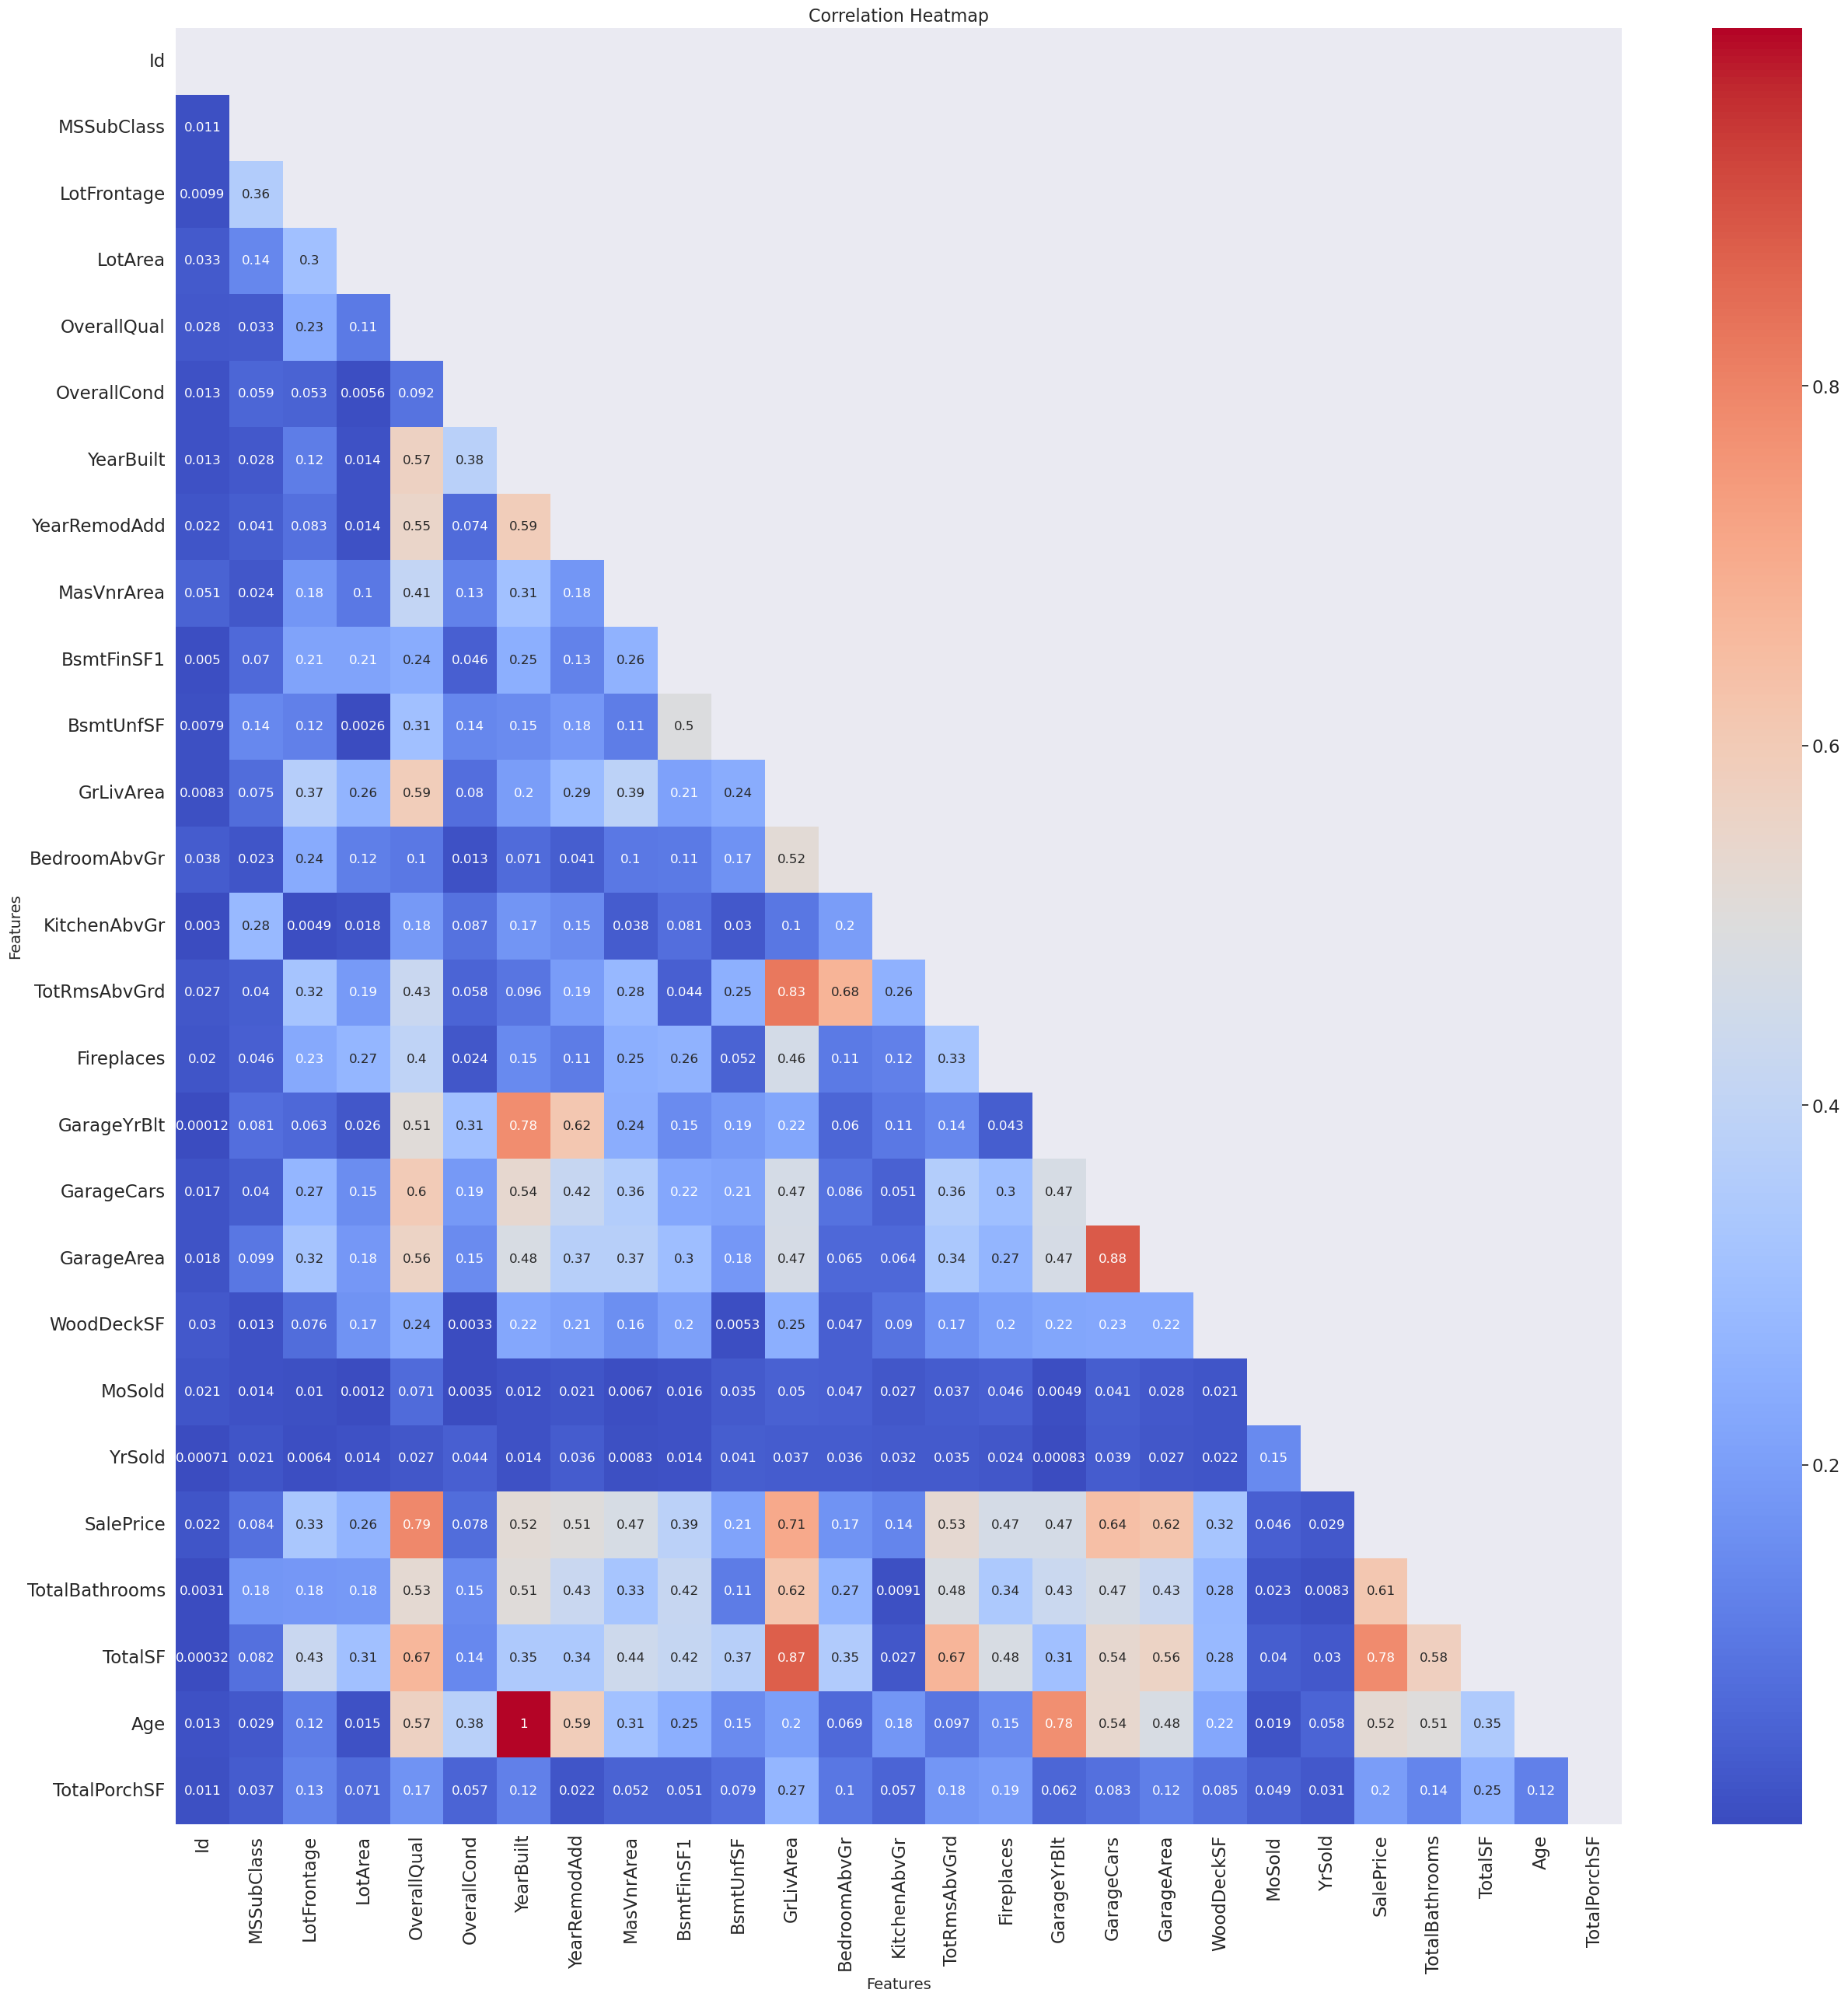

In [192]:
# Calculate the correlation matrix
corr_matrix = train_df.corr().abs()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(30, 30))

# Create the heatmap with larger font size
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, annot_kws={"size": 12})

# Set the title and axis labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Show the plot
plt.show()

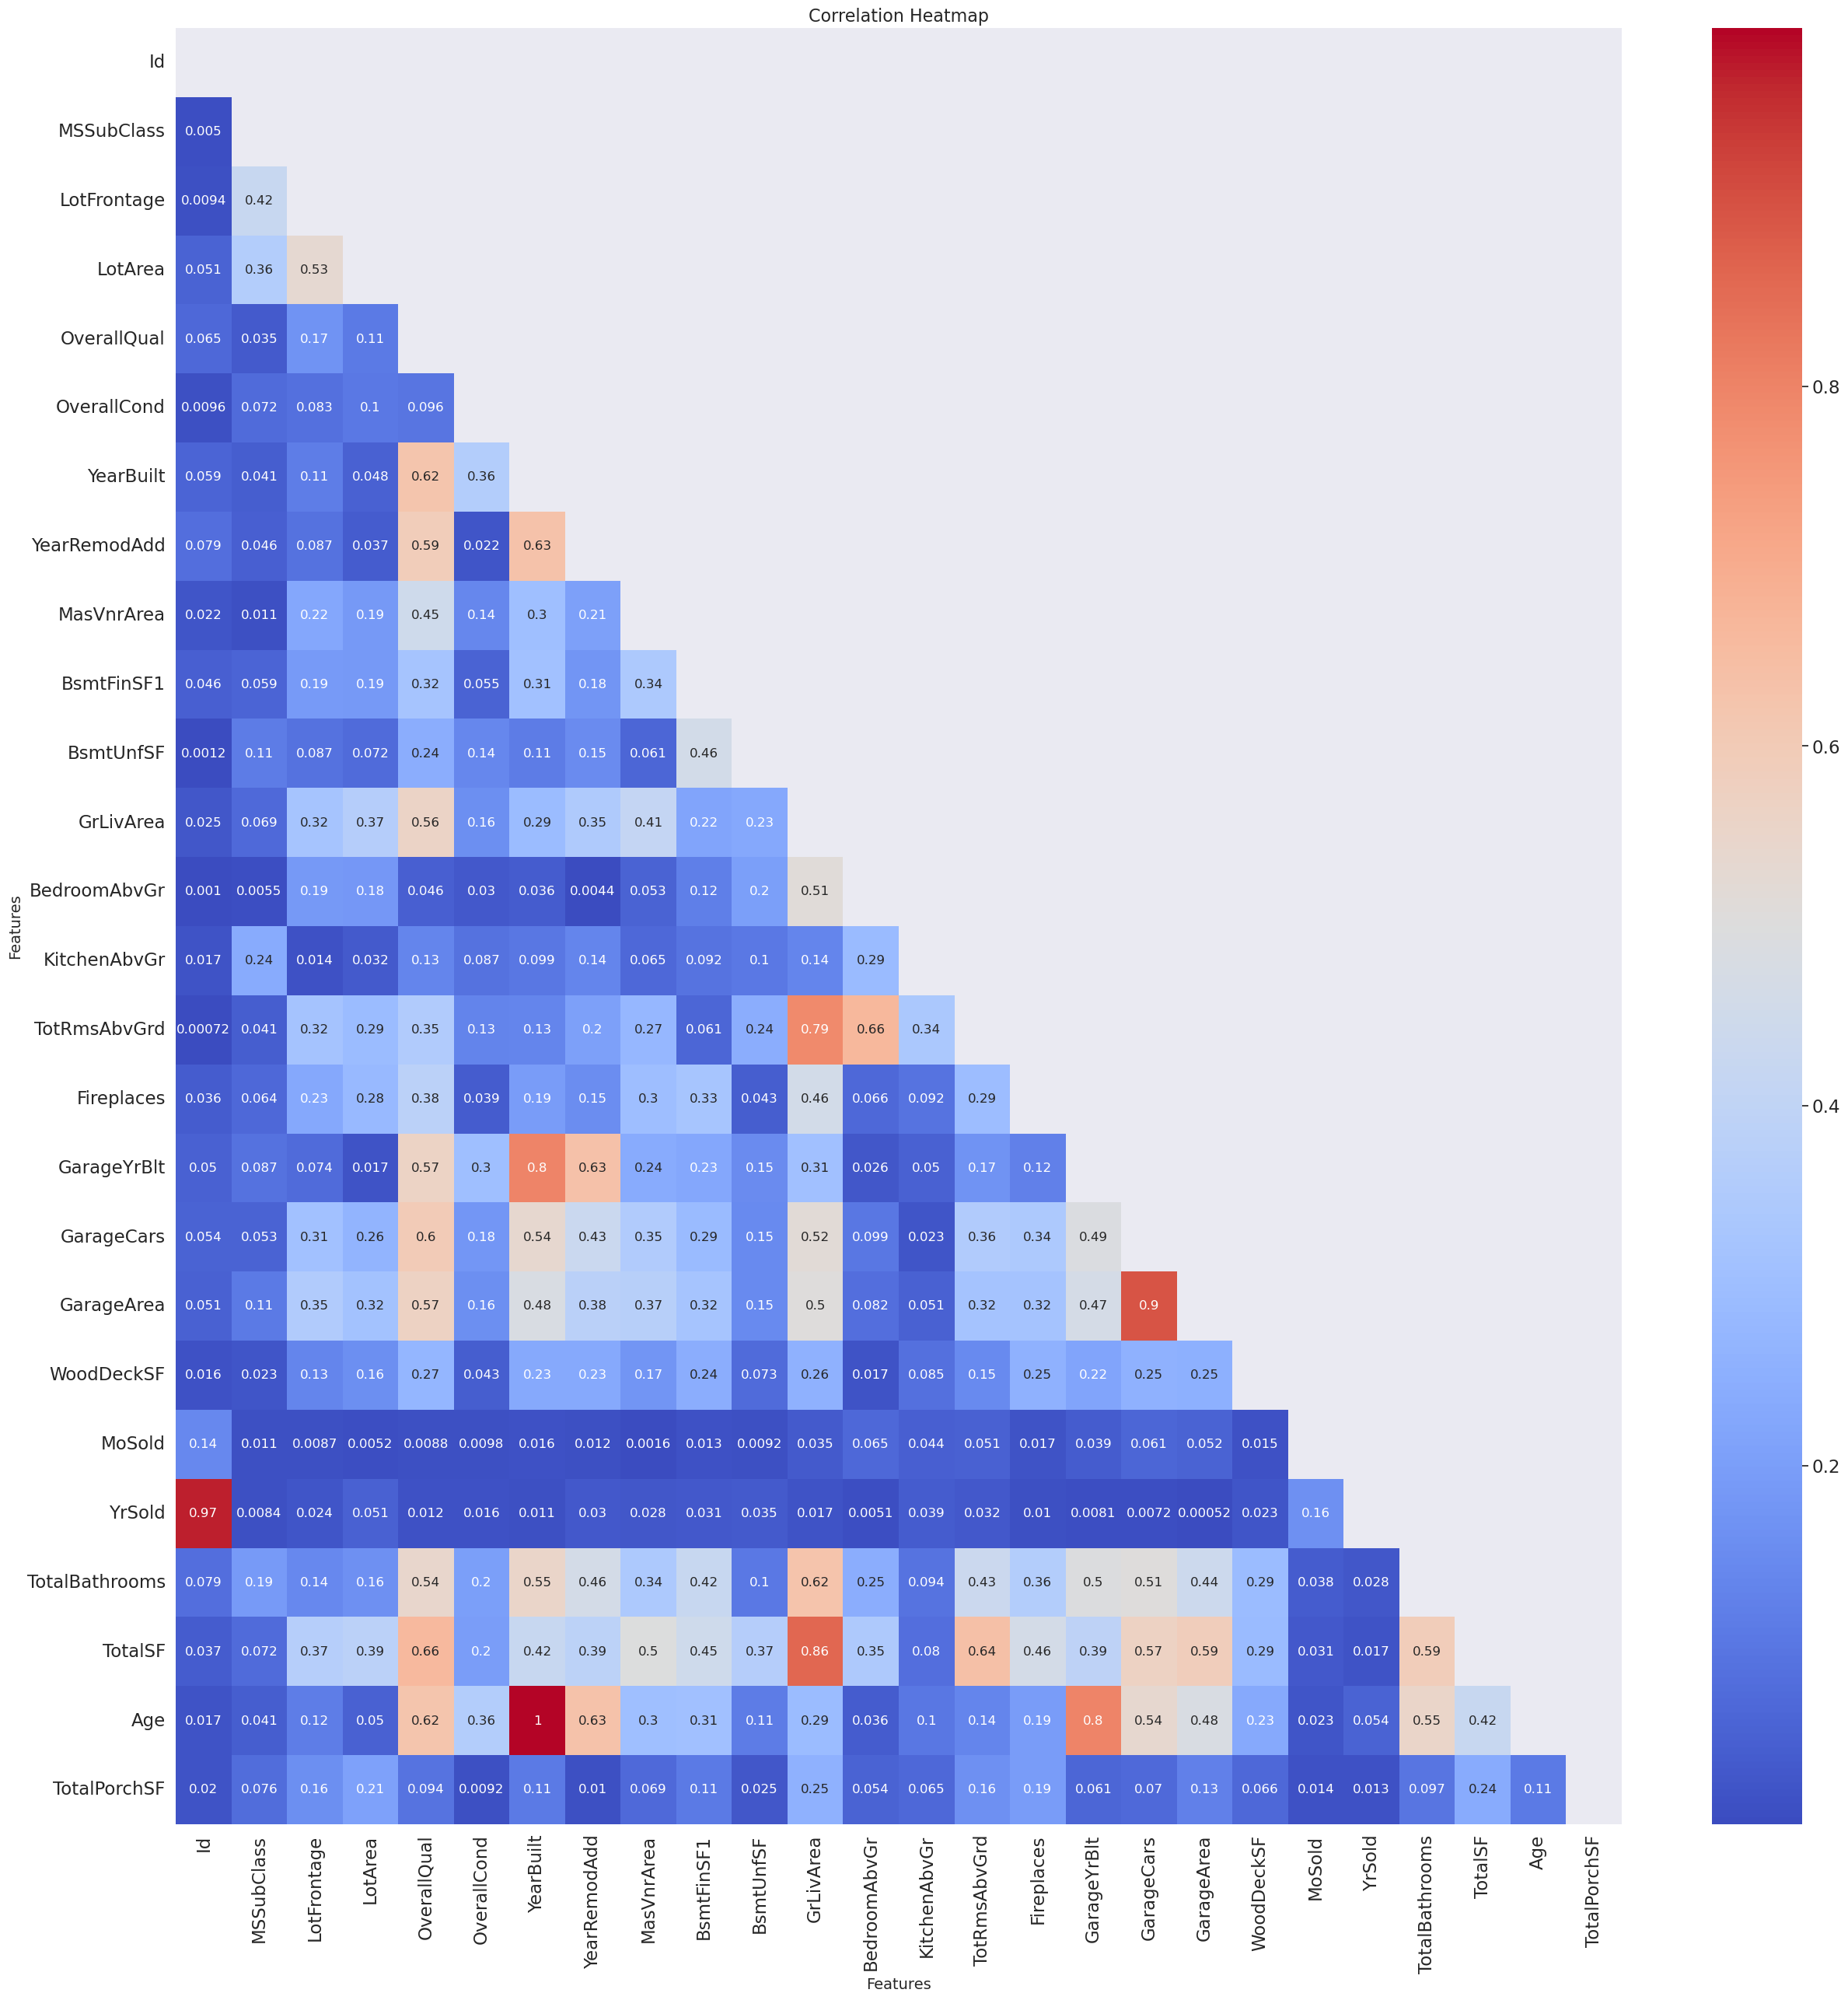

In [193]:
# Calculate the correlation matrix
corr_matrix = test_df.corr().abs()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(30, 30))

# Create the heatmap with larger font size
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, annot_kws={"size": 12})

# Set the title and axis labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Show the plot
plt.show()

# Applying Log Transformation

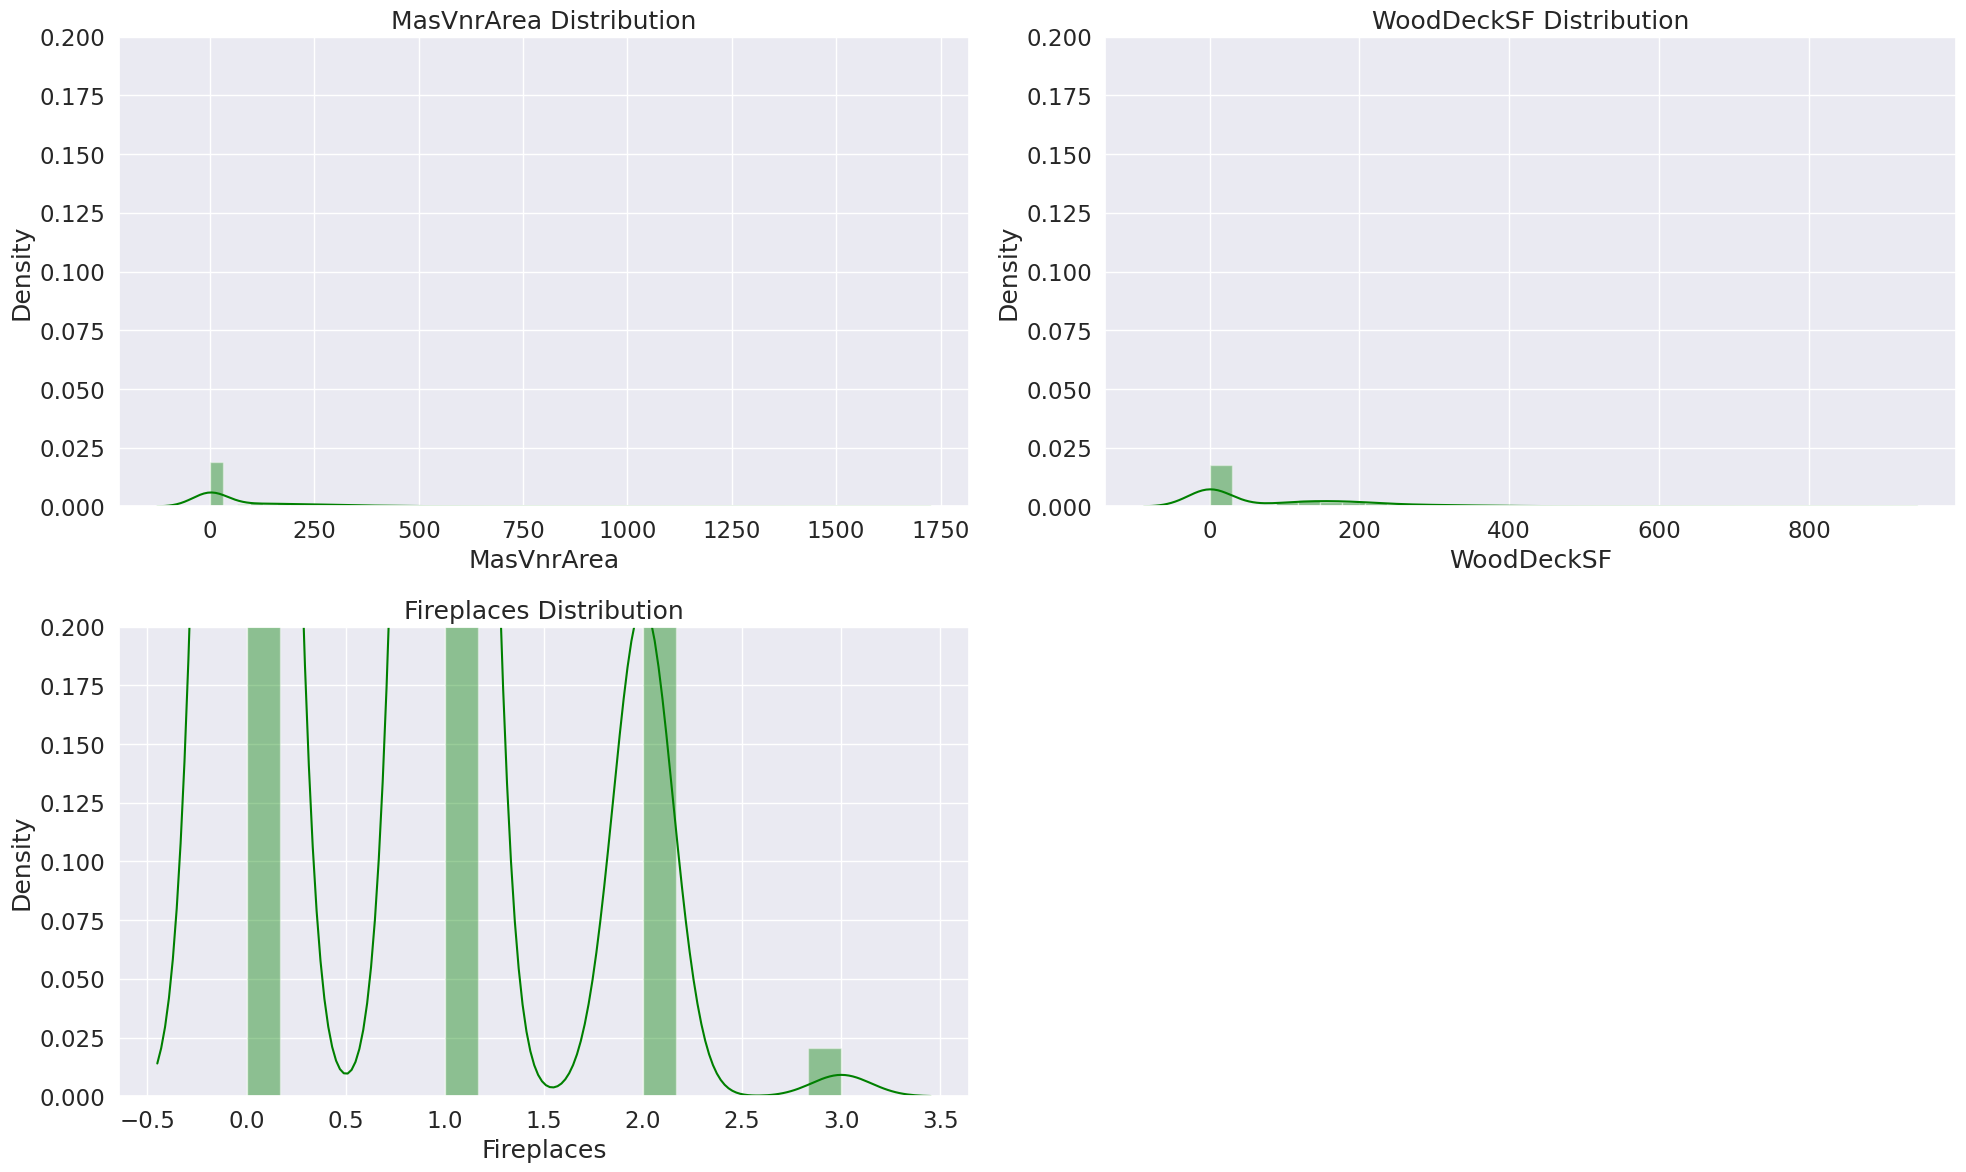

In [124]:
cols = ["MasVnrArea",  "WoodDeckSF", "Fireplaces"]



x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

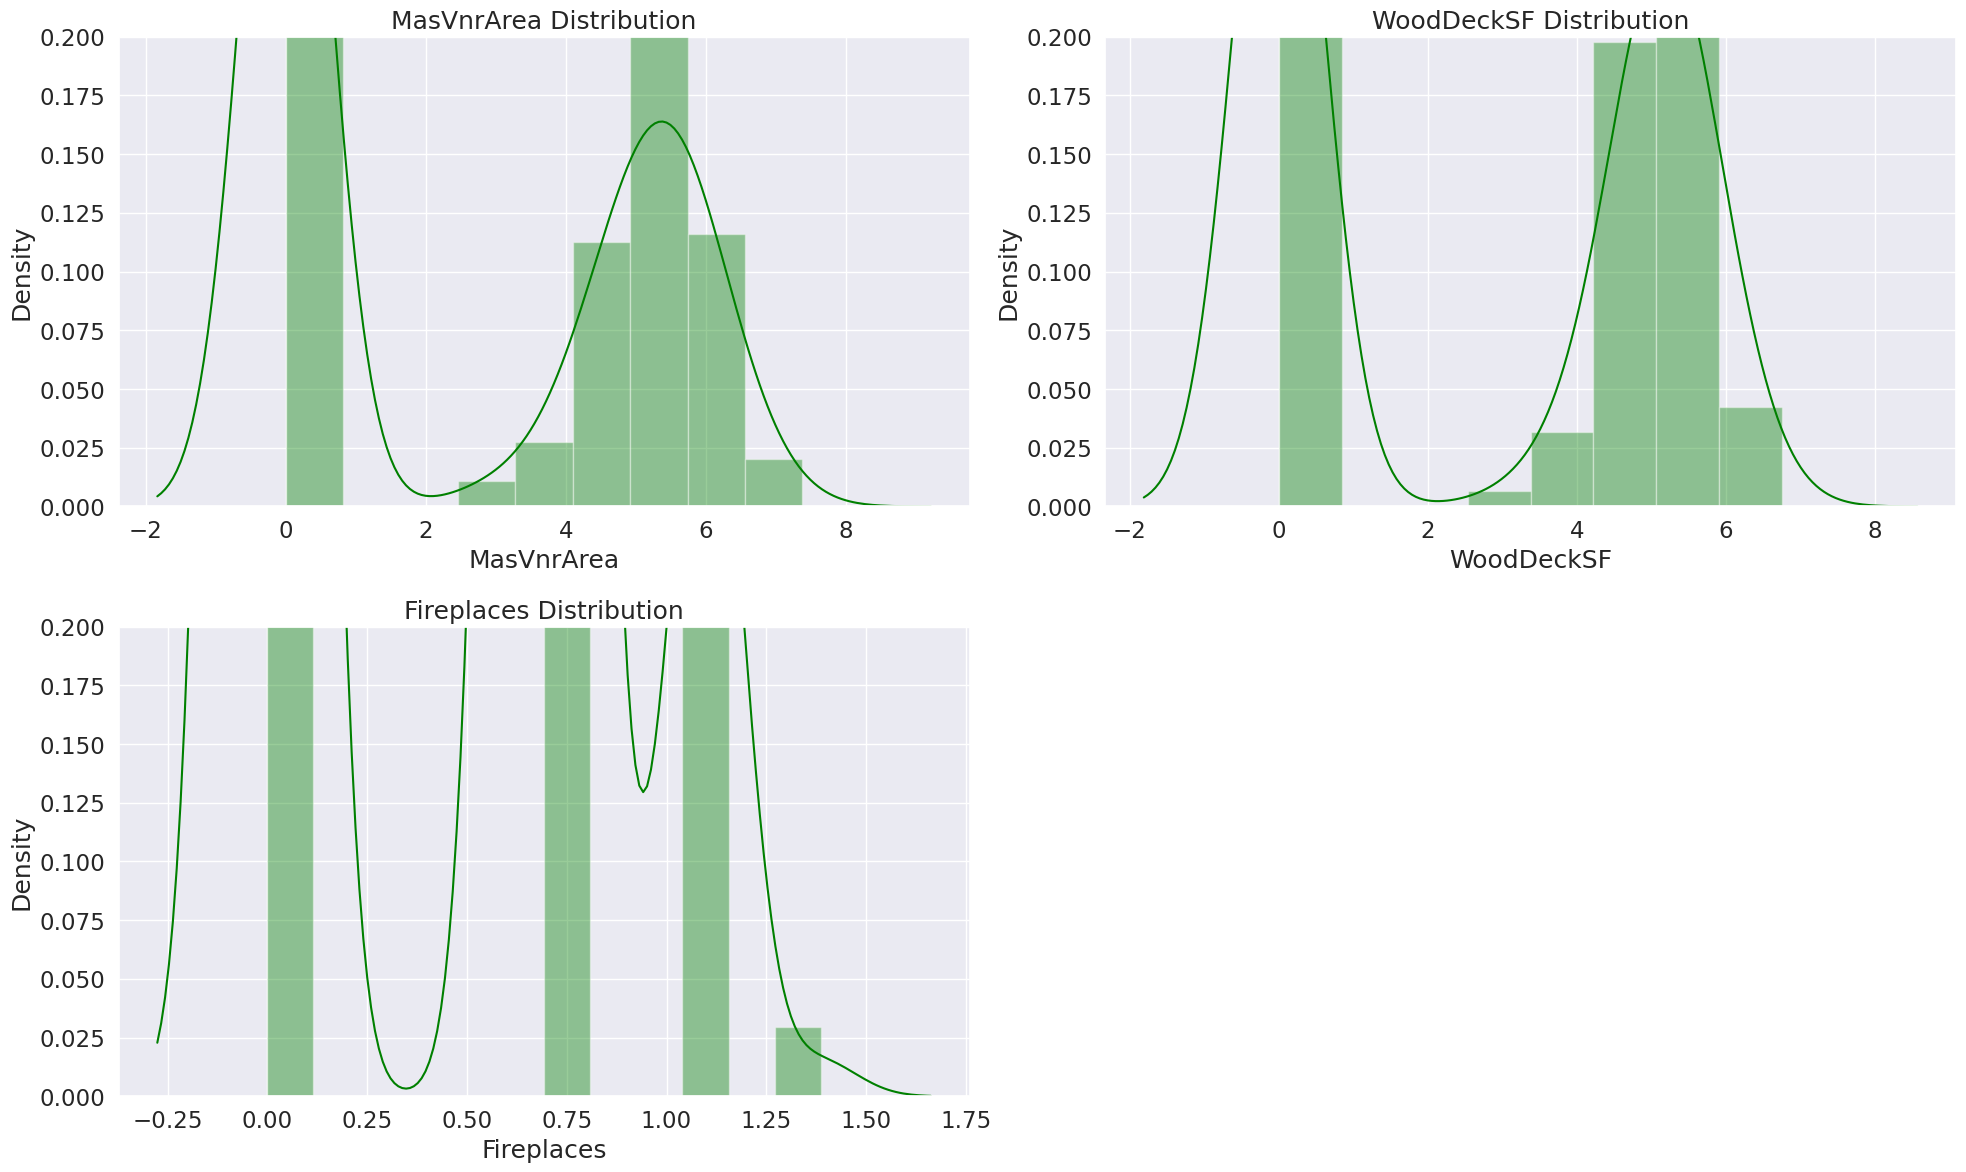

In [125]:
for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]= np.log(1+test_df[value])

x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

In [126]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.000000,190.000000
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.000000,79.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.000000,2010.000000
MasVnrArea,1460.0,2.120264,2.628759,0.0,0.00,0.000000,5.107456,7.378384
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.250000,5644.000000


In [44]:
# train_df = train_df.drop(columns=["MasVnrArea", "2ndFlrSF", "BsmtFullBath", "HalfBath", "WoodDeckSF"])
# test_df = test_df.drop(columns=["MasVnrArea", "2ndFlrSF", "BsmtFullBath", "HalfBath", "WoodDeckSF"])

In [45]:
train_df.select_dtypes(include="object").nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
Modified          2
dtype: int64

In [46]:
train_df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQualCond,TotalBathrooms,TotalSF,Age,Modified,TotalPorchSF
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.000000,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,6.751101,0.0,1710.0,0.693147,0.000000,1.098612,0.693147,3.0,1.0,Gd,8.0,Typ,0.000000,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,61.0,0.000000,0.000000,0.00000,0.0,0.000000,2.0,2008.0,WD,Normal,208500,12.0,4.0,2566.0,5.0,N,61.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.000000,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.000000,0.0,1262.0,0.000000,0.693147,1.098612,0.000000,3.0,1.0,TA,6.0,Typ,0.693147,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.0,0.000000,0.000000,0.00000,0.0,0.000000,5.0,2007.0,WD,Normal,181500,14.0,3.0,2524.0,31.0,N,0.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.000000,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,6.765039,0.0,1786.0,0.693147,0.000000,1.098612,0.693147,3.0,1.0,Gd,6.0,Typ,0.693147,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,42.0,0.000000,0.000000,0.00000,0.0,0.000000,9.0,2008.0,WD,Normal,223500,12.0,4.0,2706.0,7.0,Y,42.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.000000,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,6.629363,0.0,1717.0,0.693147,0.000000,0.693147,0.000000,3.0,1.0,Gd,7.0,Typ,0.693147,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,35.0,5.609472,0.000000,0.00000,0.0,0.000000,2.0,2006.0,WD,Abnorml,140000,12.0,2.0,2473.0,91.0,Y,307.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.000000,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,6.960348,0.0,2198.0,0.693147,0.000000,1.098612,0.693147,4.0,1.0,Gd,9.0,Typ,0.693147,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,84.0,0.000000,0.000000,0.00000,0.0,0.000000,12.0,2008.0,WD,Normal,250000,13.0,4.0,3343.0,8.0,N,84.0
5,6.0,50.0,RL,85.0,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5.0,5.0,1993.0,1995.0,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.000000,64.0,796.0,GasA,Ex,Y,SBrkr,796.0,6.340359,0.0,1362.0,0.693147,0.000000,0.693147,0.693147,1.0,1.0,TA,5.0,Typ,0.000000,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,3.713572,30.0,0.000000,5.771441,0.00000,0.0,6.552508,10.0,2009.0,WD,Normal,143000,10.0,3.0,2158.0,16.0,Y,350.0
6,7.0,20.0,RL,75.0,10084.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8.0,5.0,2004.0,2005.0,Gable,CompShg,VinylSd,VinylSd,Stone,5.231109,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.000000,317.0,1686.0,GasA,Ex,Y,SBrkr,1694.0,0.000000,0.0,1694.0,0.693147,0.000000,1.098612,0.000000,3.0,1.0,Gd,7.0,Typ,0.693147,Attchd,2004.0,RFn,2.0,636.0,TA,

# Feature Encoding with One Hot Encoding & LabelEncoding

In [47]:
#List Ordinal Categorical Features
ordinal_cat = ["MSZoning", "Condition1", 
               "Condition2", "BldgType", "HouseStyle", "RoofStyle", "MasVnrType", "ExterQual", "ExterCond", "BsmtQual", 
               "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", 
               "CentralAir", "KitchenQual", "Functional", "GarageType", 
               "GarageQual", "GarageCond"]
#List Nominal Categorical Features
nominal_cat = train_df.select_dtypes(include="object").drop(columns=ordinal_cat).columns.to_list()
nominal_cat

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Electrical',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'Modified']

## Label Encoding

In [48]:
enc = LabelEncoder()

train_df[ordinal_cat] = train_df[ordinal_cat].apply(enc.fit_transform)
test_df[ordinal_cat] = test_df[ordinal_cat].apply(enc.fit_transform)

## One Hot Encoding

In [49]:
train_df = pd.get_dummies(train_df, columns=nominal_cat)
test_df = pd.get_dummies(test_df, columns=nominal_cat)

In [50]:
print(train_df.shape)
train_df.head()


(1460, 183)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallQualCond,TotalBathrooms,TotalSF,Age,TotalPorchSF,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Modified_N,Modified_Y
0,1.0,60.0,3,65.0,8450.0,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,5.283204,2,4,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,856.0,6.751101,0.0,1710.0,0.693147,0.000000,1.098612,0.693147,3.0,1.0,2,8.0,6,0.000000,1,2003.0,2.0,548.0,4,4,0.000000,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,2008.0,208500,12.0,4.0,2566.0,5.0,61.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,2.0,20.0,3,80.0,9600.0,1,2,0,2,6.0,8.0,1976.0,1976.0,1,2,0.000000,3,4,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,1262.0,0.000000,0.0,1262.0,0.000000,0.693147,1.098612,0.000000,3.0,1.0,3,6.0,6,0.693147,1,1976.0,2.0,460.0,4,4,5.700444,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,2007.0,181500,14.0,3.0,2524.0,31.0,0.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,3.0,60.0,3,68.0,11250.0,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,5.093750,2,4,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,920.0,6.765039,

In [51]:
print(test_df.shape)
test_df.head()

(1459, 173)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQualCond,TotalBathrooms,TotalSF,Age,TotalPorchSF,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Modified_N,Modified_Y
0,1461.0,20.0,2,80.0,11622.0,1,2,0,2,5.0,6.0,1961.0,1961.0,1,2,0.000000,3,4,3,3,3,4,468.0,3,4.976734,270.0,882.0,0,4,1,896.0,0.000000,0.0,896.0,0.0,0.0,0.693147,0.000000,2.0,1.0,3,5.0,6,0.000000,1,1961.0,1.0,730.0,3,4,4.948760,0.0,0.0,0.0,4.795791,0.0,0.000000,6.0,2010.0,11.0,1.0,1778.0,49.0,120.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1462.0,20.0,3,81.0,14267.0,2,2,0,2,6.0,6.0,1958.0,1958.0,3,1,4.691348,3,4,3,3,3,0,923.0,5,0.000000,406.0,1329.0,0,4,1,1329.0,0.000000,0.0,1329.0,0.0,0.0,0.693147,0.693147,3.0,1.0,2,6.0,6,0.000000,1,1958.0,1.0,312.0,3,4,5.976351,36.0,0.0,0.0,0.000000,0.0,9.433564,6.0,2010.0,12.0,2.0,2658.0,52.0,36.0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1463.0,60.0,3,74.0,13830.0,2,2,0,4,5.0,5.0,1997.0,1998.0,1,2,0.000000,3,4,2,3,3,2,791.0,5,0.000000,137.0,928.0,0,2,1,928.0,6.553933,0.0,1629.0,0.0,0.0,1.098612,0.693147,3.0,1.0,3,6.0,6,0.693147,1,1997.0,2.0,482.0,3,4,5.361292,34.0,0.0,0.0,0.000000,0.0,0.000000,3.0,2010.0,10.0,3.0,2557.0,13.0,34.0,0,1,1,0,0,0,0,0,0,1,1,0,0,0

In [52]:
train_df_columns = set(train_df.columns)
test_df_columns = set(test_df.columns)

extra_columns = train_df_columns - test_df_columns

print(extra_columns)


{'SalePrice', 'RoofMatl_Metal', 'Exterior2nd_Other', 'Electrical_Mix', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'Utilities_NoSeWa'}


# Selecting Features & Labels for Model Training

In [53]:
X = train_df.drop(columns=['SalePrice', 'Id', 'Exterior1st_Stone', 'Exterior1st_ImStucc', 'RoofMatl_Roll', 'RoofMatl_Metal', 'Exterior2nd_Other', 'RoofMatl_Membran', 'Electrical_Mix', 'RoofMatl_ClyTile', 'Utilities_NoSeWa'])
y = train_df[["SalePrice"]]


In [54]:
X = X.astype(int)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQualCond,TotalBathrooms,TotalSF,Age,TotalPorchSF,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Modified_N,Modified_Y
0,60,3,65,8450,2,2,0,5,7,5,2003,2003,1,1,5,2,4,2,3,3,2,706,5,0,150,856,1,0,1,856,6,0,1710,0,0,1,0,3,1,2,8,6,0,1,2003,2,548,4,4,0,61,0,0,0,0,0,2,2008,12,4,2566,5,61,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,20,3,80,9600,1,2,0,2,6,8,1976,1976,1,2,0,3,4,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,0,1,0,3,1,3,6,6,0,1,1976,2,460,4,4,5,0,0,0,0,0,0,5,2007,14,3,2524,31,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,60,3,68,11250,2,2,0,5,7,5,2001,2002,1,1,5,2,4,2,3,2,2,486,5,0,434,920,1,0,1,920,6,0,1786,0,0,1,0,3,1,2,6,6,0,1,2001,2,608,4,4,0,42,0,0,0,0,0,9,2008,12,4,2706,7,42,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,70,3,60,9550,2,2,0,5,7,5,1915,1970,1,2,0,3,4,3,1,3,0,216,5,0,540,756,1,2,1,961,6,0,1717,0,0,0,0,3,1,2,7,6,0,5,1998,3,642,4,4,0,35,5,0,0,0,0,2,2006,12,2,2473,91,307,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [55]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


# Feature Scaling 

In [56]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

# Split Data for Model that Don't Need Scaled Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1168, 172) (1168, 1)
(292, 172) (292, 1)


# Split Data for Model that Need Scaled Data

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(1168, 172) (1168, 1)
(292, 172) (292, 1)


# Model Building for Scaled Data

In [59]:
training_score=[]
testing_score=[]

In [60]:
def scaled_model_prediction(model):
    from sklearn.metrics import mean_absolute_error

    model.fit(X_train1, y_train1)

    X_train_pred1 = model.predict(X_train1)
    X_test_pred1 = model.predict(X_test1)

    a = mean_absolute_error(y_train1, X_train_pred1)
    b = mean_absolute_error(y_test1, X_test_pred1)
    training_score.append(a)
    testing_score.append(b)

    print(f"MAE Score of {model} model on Training Data is:", a)
    print(f"MAE Score of {model} model on Testing Data is:", b)
    


In [61]:
def unscaled_model_prediction(model):

    model.fit(X_train, y_train)

    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)

    a = mean_absolute_error(y_train, X_train_pred)
    b = mean_absolute_error(y_test, X_test_pred)
    training_score.append(a)
    testing_score.append(b)

    print(f"MAE Score of {model} model on Training Data is:", a)
    print(f"MAE Score of {model} model on Testing Data is:", b)
    

# Analysis of models that need scaled data

### Logistic Regression

In [63]:
scaled_model_prediction(LogisticRegression(random_state=0))

MAE Score of LogisticRegression(random_state=0) model on Training Data is: 6.421232876712328
MAE Score of LogisticRegression(random_state=0) model on Testing Data is: 34217.87671232877


### Linear Regression

In [64]:
#scaled_model_prediction(LinearRegression())

### Ridge Regression

In [65]:
scaled_model_prediction(Ridge(random_state=0))

MAE Score of Ridge(random_state=0) model on Training Data is: 14978.050124660778
MAE Score of Ridge(random_state=0) model on Testing Data is: 24147.653554449924


### Lasso Regression

In [66]:
scaled_model_prediction(Lasso(random_state=0))

MAE Score of Lasso(random_state=0) model on Training Data is: 14978.936139829386
MAE Score of Lasso(random_state=0) model on Testing Data is: 24174.06664011629


### ElasticNet Regression

In [67]:
scaled_model_prediction(ElasticNet(random_state=0))

MAE Score of ElasticNet(random_state=0) model on Training Data is: 15472.539519638658
MAE Score of ElasticNet(random_state=0) model on Testing Data is: 20821.370181302496


### K-Nearest Neighbors Regression 

In [68]:
scaled_model_prediction(KNeighborsRegressor())

MAE Score of KNeighborsRegressor() model on Training Data is: 20810.177226027397
MAE Score of KNeighborsRegressor() model on Testing Data is: 26764.833561643838


### Multi-layer Perceptron Regression

In [69]:
#scaled_model_prediction(MLPRegressor())

### Gaussian Process Regression

In [70]:
#scaled_model_prediction(GaussianProcessRegressor())

### BayesianRidge Regression

In [71]:
scaled_model_prediction(BayesianRidge())

MAE Score of BayesianRidge() model on Training Data is: 14967.77490117827
MAE Score of BayesianRidge() model on Testing Data is: 22774.726250251028


### Support Vector Regression

In [72]:
scaled_model_prediction(SVR())

MAE Score of SVR() model on Training Data is: 55500.66283545157
MAE Score of SVR() model on Testing Data is: 55530.50042373995


### Decision Tree Regression

In [73]:
unscaled_model_prediction(DecisionTreeRegressor(random_state=0))

MAE Score of DecisionTreeRegressor(random_state=0) model on Training Data is: 0.0
MAE Score of DecisionTreeRegressor(random_state=0) model on Testing Data is: 26287.83904109589


### Random Forest Regression

In [74]:
unscaled_model_prediction(RandomForestRegressor(random_state=0))

MAE Score of RandomForestRegressor(random_state=0) model on Training Data is: 6198.997011986301
MAE Score of RandomForestRegressor(random_state=0) model on Testing Data is: 17044.147397260276


### Gradient Boosting Regression

In [75]:
unscaled_model_prediction(GradientBoostingRegressor(random_state=0))

MAE Score of GradientBoostingRegressor(random_state=0) model on Training Data is: 9677.067528008522
MAE Score of GradientBoostingRegressor(random_state=0) model on Testing Data is: 16252.736643157676


### AdaBoost Regression

In [76]:
unscaled_model_prediction(AdaBoostRegressor(random_state=0))

MAE Score of AdaBoostRegressor(random_state=0) model on Training Data is: 21168.31187366618
MAE Score of AdaBoostRegressor(random_state=0) model on Testing Data is: 24285.46526952644


### XGBoost Regression

In [77]:
unscaled_model_prediction(XGBRegressor(random_state=0))

MAE Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) model on Training Data is: 855.3947720462329
MAE Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma

### LightGBM Regression

In [83]:
unscaled_model_prediction(LGBMRegressor(random_state=0))

MAE Score of LGBMRegressor(random_state=0) model on Training Data is: 5147.651908497889
MAE Score of LGBMRegressor(random_state=0) model on Testing Data is: 17340.518586992148


### CatBoost Regression

In [84]:
unscaled_model_prediction(CatBoostRegressor(verbose=False, random_state=0))

MAE Score of <catboost.core.CatBoostRegressor object at 0x7fdd350f7f10> model on Training Data is: 4061.3097644822733
MAE Score of <catboost.core.CatBoostRegressor object at 0x7fdd350f7f10> model on Testing Data is: 15413.349444081152


In [85]:
models = ["Logistic Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression", "K-Nearest Neighbors Regression",
          "BayesianRidge Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression", 
          "AdaBoost Regressor", "XGBoost Regression", "LightGBM Regression", "CatBoost Regression"]

mae_comparison = pd.DataFrame({"Algorithm": models,
                               "Training Score (MAE)": training_score[:len(models)],
                               "Testing Score (MAE)": testing_score[:len(models)]
})

mae_comparison

,Algorithm,Training Score (MAE),Testing Score (MAE)
0,Logistic Regression,6.421233,34217.876712
1,Ridge Regression,6.421233,34217.876712
2,Lasso Regression,14978.050125,24147.653554
3,ElasticNet Regression,14978.936140,24174.066640
4,K-Nearest Neighbors Regression,15472.539520,20821.370181
5,BayesianRidge Regression,20810.177226,26764.833562
6,Support Vector Regression,14967.774901,22774.726250
7,Decision Tree Regression,55500.662835,55530.500424
8,Random Forest Regression,0.000000,26287.839041
9,Gradient Boosting Regression,6198.997012,17044.147397


# PLotting The Scores 

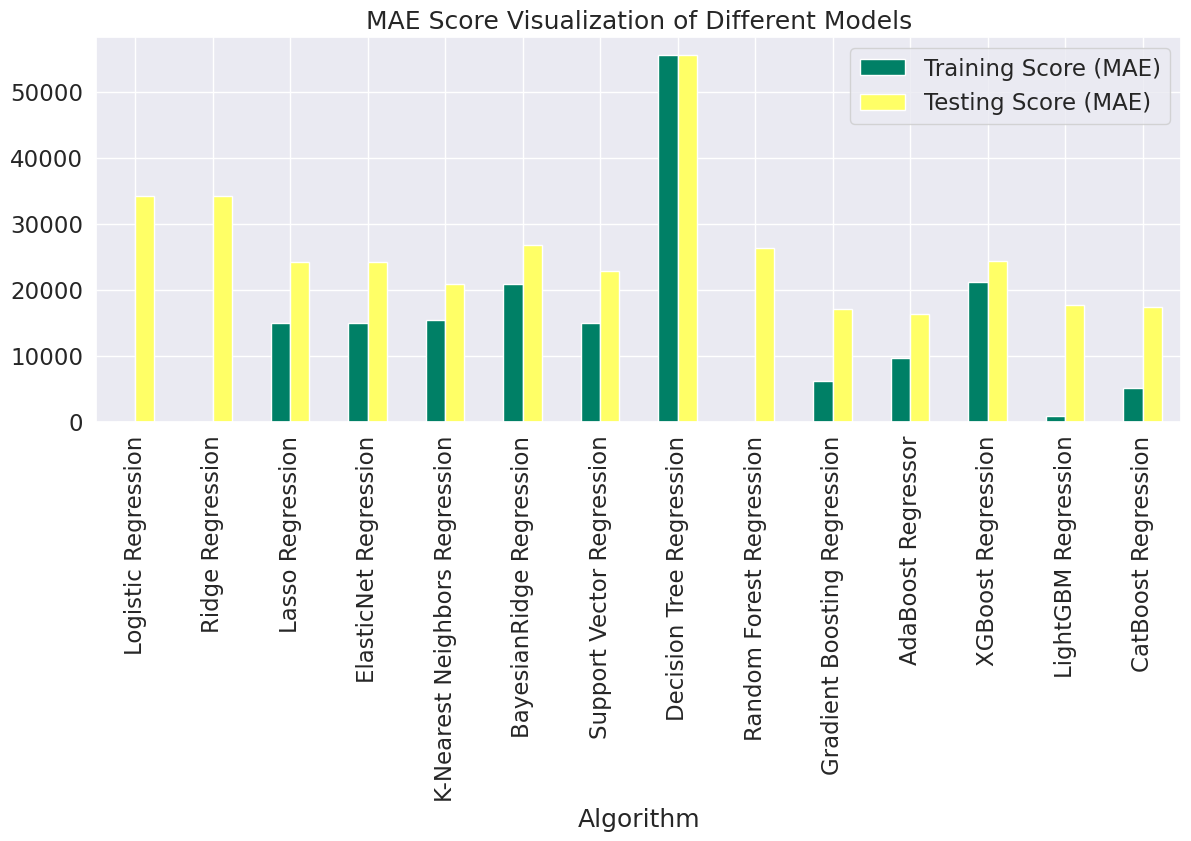

In [86]:
mae_comparison.plot(x="Algorithm", y=["Training Score (MAE)", "Testing Score (MAE)"], figsize=(14,5), kind="bar", 
                                      title="MAE Score Visualization of Different Models", colormap="summer")
plt.show()

In [869]:
#Lower score means better. Random Forest Regression, Gradient Boosting Regression, XGBoost Regression, LightGBM Regression, CatBoost Regression models are perfoming good
#We will do the hyperparameter tuning for these model

# Hyper-Parameter Tuning of Random Forest

In [870]:
# model1 = LGBMRegressor()

# parameters1 = {"n_estimators":[100,300,500,600,650],
#               "learning_rate":[0.01,0.02,0.03],
#               "random_state":[0,42,48,50],
#                "num_leaves":[16,17,18]}

# grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

# grid_search1.fit(X_train, y_train.values.ravel())

# print(grid_search1.best_score_)

# best_parameters1 = grid_search1.best_params_
# best_parameters1

In [871]:
# model1 = LGBMRegressor(**best_parameters1)

# model1.fit(X_train,y_train)

# x_test_pred1 = model1.predict(X_test)

# mean_absolute_error(y_test,x_test_pred1)

In [872]:
# model2 = CatBoostRegressor(verbose=False)

# parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
#               "random_state":[0,42,48,50],
#                "depth":[8,9,10],
#                "iterations":[35,40,50]}

# grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

# grid_search2.fit(X_train,y_train)

# grid_search2.best_score_

# best_parameters2 = grid_search2.best_params_
# best_parameters2

In [873]:
model2 = CatBoostRegressor(verbose=False, random_state=0)

model2.fit(X_train,y_train)

x_test_pred2 = model2.predict(X_test)

mean_absolute_error(y_test,x_test_pred2)

15924.08902037658

In [874]:
# model3 = XGBRegressor()

# parameters3 = {"n_estimators":[50,100,150],
#              "random_state":[0,42,50],
#              "learning_rate":[0.1,0.3,0.5,1.0]}

# grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

# grid_search3.fit(X_train,y_train)

# grid_search3.best_score_

# best_parameters3 = grid_search3.best_params_
# best_parameters3

In [875]:
# model3 = XGBRegressor(**best_parameters3)

# model3.fit(X_train,y_train)

# x_test_pred3 = model3.predict(X_test)

# mean_absolute_error(y_test,x_test_pred3)

In [876]:
# model4 = RandomForestRegressor()

# parameters4 = {'n_estimators': [100,300,500,550],
#                'min_samples_split':[7,8,9],
#                'max_depth': [10,11,12], 
#                'min_samples_leaf':[4,5,6]}

# grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

# grid_search4.fit(X_train,y_train.values.ravel())

# grid_search4.best_score_

# best_parameters4 = grid_search4.best_params_
# best_parameters4



In [877]:
model4 = RandomForestRegressor(random_state=0)

model4.fit(X_train,y_train)

x_test_pred4 = model4.predict(X_test)

mean_absolute_error(y_test,x_test_pred4)

17532.63226027397

In [878]:
# model5 = GradientBoostingRegressor()

# parameters5 = {'n_estimators': [100, 300, 500, 550],
#                'min_samples_split': [7, 8, 9],
#                'max_depth': [10, 11, 12],
#                'min_samples_leaf': [4, 5, 6]}

# grid_search5 = GridSearchCV(model5, parameters5, cv=5, n_jobs=-1)

# grid_search5.fit(X_train, y_train.values.ravel())

# grid_search5.best_score_

# best_parameters5 = grid_search4.best_params_
# best_parameters5


In [879]:
model5 = GradientBoostingRegressor(random_state=0)

model5.fit(X_train,y_train)

y_test_pred5 = model5.predict(X_test)

mean_absolute_error(y_test, y_test_pred5)


17106.300528070715

In [880]:
stacking_model = StackingRegressor(estimators = [('CAT Boost', model2),
                                                 ('Random Forest', model4),
                                                 ('Gradient Boost', model5)])

stacking_model.fit(X_train, y_train)
x_train_pred6 = stacking_model.predict(X_train)
x_test_pred6 = stacking_model.predict(X_test)

print("Stacking Model MAE on Testing Data is:",mean_absolute_error(y_train, x_train_pred6))
print("Stacking Model MAE on Testing Data is:",mean_absolute_error(y_test, x_test_pred6))

Stacking Model MAE on Testing Data is: 3933.9438412639884
Stacking Model MAE on Testing Data is: 16673.688122419524


In [ ]:
test_df
test_df_no_id = test_df.drop(columns=["Id"])

# Fitting model on full training dataset and generating output for testing dataset

In [ ]:
model_on_full_data = StackingRegressor(estimators = [('CAT Boost', model2),
                                                     ('Random Forest', model4),
                                                     ('Gradient Boost', model5)])

# fit rf_model_on_full_data on all data from the training data
model_on_full_data.fit(X_scaled, y)

test_preds = model_on_full_data.predict(test_df_no_id)

# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)